<a href="https://colab.research.google.com/github/jinijavac/Power-Consumption-Prediction/blob/main/%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%85%E1%85%A7%E1%86%A8%E1%84%89%E1%85%A1%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%85%E1%85%A3%E1%86%BC%E1%84%8B%E1%85%A8%E1%84%8E%E1%85%B3%E1%86%A8mape27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from keras.losses import Huber

In [ ]:
# MAPE 함수 정의
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from google.colab import files
uploaded = files.upload()

# 데이터 불러오기
data = pd.read_csv("dataset_household.csv", engine='python')

Saving dataset_household.csv to dataset_household.csv


In [ ]:
train_data = data.iloc[168:840, 1:12]
test_data = data.iloc[840:, 1:12]

X_train = train_data.iloc[:, :-1].values
Y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
Y_test = test_data.iloc[:, -1].values

In [ ]:
correlation_matrix = data.corr()

consumption_correlation = correlation_matrix['Consumption']

print(consumption_correlation)

HOTD           0.317446
DOTW           0.003951
Holi           0.022064
Cons_1         0.315678
Cons_7         0.285728
Temp           0.127922
Humi          -0.198323
WS             0.101237
WCT            0.110231
THI            0.141165
Consumption    1.000000
Name: Consumption, dtype: float64


<ipython-input-5-eadb77c1741c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
X_train_selected = X_train[:, [0, 3]]
X_test_selected = X_test[:, [0, 3]]

In [ ]:
scaler = StandardScaler()
X_train_clean = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(7, 7),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=128,
    learning_rate='constant',
    random_state=42
)


scoring = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

mape_scores = cross_val_score(mlp_model, X_train, Y_train, cv=5, scoring=scoring)

mean_mape = -mape_scores.mean()
print("MAPE with fixed hyperparameters:", mean_mape)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAPE with fixed hyperparameters: 59.99255490659236


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp_model.fit(X_train_selected, Y_train)

mlp_pred = mlp_model.predict(X_test_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
lstm_model.add(keras.layers.LSTM(64, activation='relu'))
lstm_model.add(keras.layers.Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 학습률
def learning_rate_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

lr_scheduler = keras.callbacks.LearningRateScheduler(learning_rate_scheduler)
lstm_model.fit(X_train.reshape(-1, X_train.shape[1], 1), Y_train, epochs=100, batch_size=16, callbacks=[lr_scheduler])

lstm_pred = lstm_model.predict(X_test.reshape(-1, X_test.shape[1], 1))

Epoch 1/100
42/42 [==============================] - 8s 24ms/step - loss: 449122.7188 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 1s 18ms/step - loss: 260540.8281 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 1s 16ms/step - loss: 241717.8281 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 1s 15ms/step - loss: 242584.4531 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 1s 16ms/step - loss: 235772.6719 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 1s 16ms/step - loss: 232629.3125 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 1s 16ms/step - loss: 234261.1875 - lr: 0.0010
Epoch 8/100
42/42 [==============================] - 1s 16ms/step - loss: 231044.8750 - lr: 0.0010
Epoch 9/100
42/42 [==============================] - 1s 16ms/step - loss: 229464.8125 - lr: 0.0010
Epoch 10/100
42/42 [==============================] - 1s 16ms/step - loss: 227354.6406 - lr: 0.0010
Epoch 11/

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()
knn_model = KNeighborsRegressor()

In [ ]:
rf_model.fit(X_train, Y_train)
gb_model.fit(X_train, Y_train)
svr_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)
mlp_model.fit(X_train_selected, Y_train)

rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
svr_pred = svr_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test_selected)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp_pred = mlp_model.predict(X_test_selected)
lstm_pred = lstm_model.predict(X_test.reshape(-1, X_test.shape[1], 1)).reshape(-1)
rf_pred = rf_model.predict(X_test).reshape(-1)
gb_pred = gb_model.predict(X_test).reshape(-1)
svr_pred = svr_model.predict(X_test).reshape(-1)
knn_pred = knn_model.predict(X_test).reshape(-1)

77/77 [==============================] - 0s 5ms/step


In [ ]:
rf_mape = mean_absolute_percentage_error(Y_test, rf_pred)
gb_mape = mean_absolute_percentage_error(Y_test, gb_pred)
svr_mape = mean_absolute_percentage_error(Y_test, svr_pred)
knn_mape = mean_absolute_percentage_error(Y_test, knn_pred)
mlp_mape = mean_absolute_percentage_error(Y_test, mlp_pred)
lstm_mape = mean_absolute_percentage_error(Y_test, lstm_pred)

print("Random Forest MAPE:", rf_mape)
print("Gradient Boosting MAPE:", gb_mape)
print("SVR MAPE:", svr_mape)
print("K-Nearest Neighbors MAPE:", knn_mape)
print("MLP MAPE:", mlp_mape)
print("LSTM MAPE:", lstm_mape)

Random Forest MAPE: 36.845431230019095
Gradient Boosting MAPE: 165.24405939078684
SVR MAPE: 31.78731582969685
K-Nearest Neighbors MAPE: 33.08593700906121
MLP MAPE: 43.31950042188698
LSTM MAPE: 97.15600890957546


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, Y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_mape = mean_absolute_percentage_error(Y_test, xgb_pred)

print("XGBoost MAPE:", xgb_mape)

XGBoost MAPE: 99.9890940531119


In [ ]:
weights = [0.05, 0.087, 2.5, 0.1, 0.7, 0.09, 0.08]

ensemble_pred = np.average([rf_pred, gb_pred, svr_pred, knn_pred, mlp_pred, lstm_pred, xgb_pred], weights=weights, axis=0)

print("Ensemble Prediction:", ensemble_pred)

ensemble_mape = mean_absolute_percentage_error(Y_test, ensemble_pred)

print("Ensemble MAPE:", ensemble_mape)

Ensemble Prediction: [362.7380284  467.5111794  400.79937731 ... 334.79054423 704.7097891
 603.76677839]
Ensemble MAPE: 29.094770348231304


In [ ]:
rmse_combined = math.sqrt(mean_squared_error(Y_test, ensemble_pred))
mae_combined = mean_absolute_error(Y_test, ensemble_pred)
mape_combined = mean_absolute_percentage_error(Y_test, ensemble_pred)

In [ ]:
result = [["Ensemble", rmse_combined, mae_combined, mape_combined]]
result = pd.DataFrame(result, columns=["Model", "RMSE", "MAE", "MAPE"])
result.to_csv("Ensemble_Results.csv", header=True, index=False)

result

,Model,RMSE,MAE,MAPE
0,Ensemble,504.106159,260.041892,29.139761


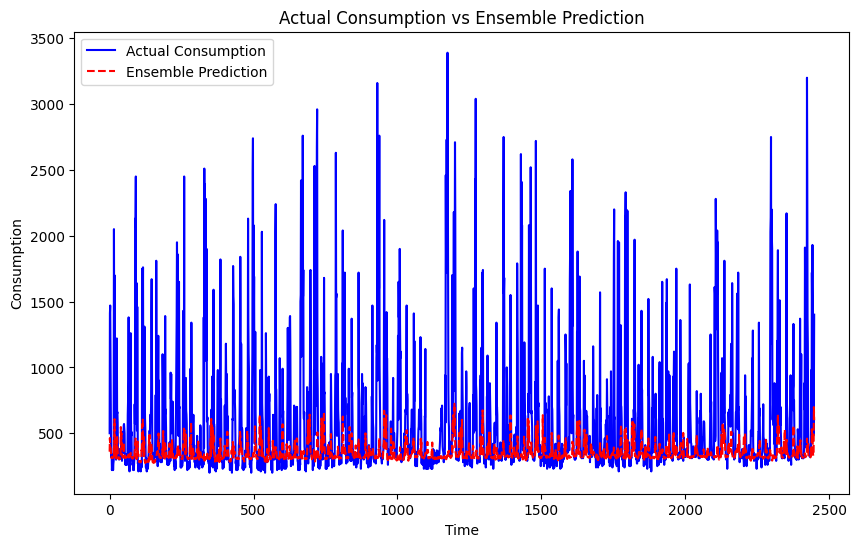

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='Actual Consumption', color='blue')
plt.plot(ensemble_pred, label='Ensemble Prediction', linestyle='dashed', color='red')
plt.title('Actual Consumption vs Ensemble Prediction')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()